## Final Machine Learning Model 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import seaborn as sns
from sklearn.preprocessing import  MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
import pickle
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [36]:
"""
reading the data from the disk

"""
# train data
train_features  = pd.read_csv('training_data.csv')

#  test data 
test_features  = pd.read_csv('testing_data.csv')

# train labels 
train_labels  = pd.read_csv('training_target.csv')


# tets labels
test_labels = pd.read_csv('testing_target.csv')

In [33]:
print('The shape of the Training data: ', train_data.shape)
print("*"*50)
print('The shape of the Testing data :  ', test_data.shape)
print("*"*50)
print('The shape of the Training target :  ', train_labels.shape)
print("*"*50)
print('The shape of the Testing target :   ', test_labels.shape)

The shape of the Training data:  (6622, 64)
**************************************************
The shape of the Testing data :   (2839, 64)
**************************************************
The shape of the Training target :   (6622, 1)
**************************************************
The shape of the Testing target :    (2839, 1)


In [39]:
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

# Sklearn wants the labels as one-dimensional vectors
y = np.array(train_labels).reshape((-1,))
y_test = np.array(test_labels).reshape((-1,))

In [34]:
# Error function 
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [31]:
# we will load the modelform the pickel file taht we have saved in the Model preparation processes .


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(loss='lad', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=100, random_state=42)

model.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='lad', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
model_pred = model.predict(X_test)

print('Final Model Performance is ' , mae(y_test, model_pred))

Final Model Performance is  9.04255779049344


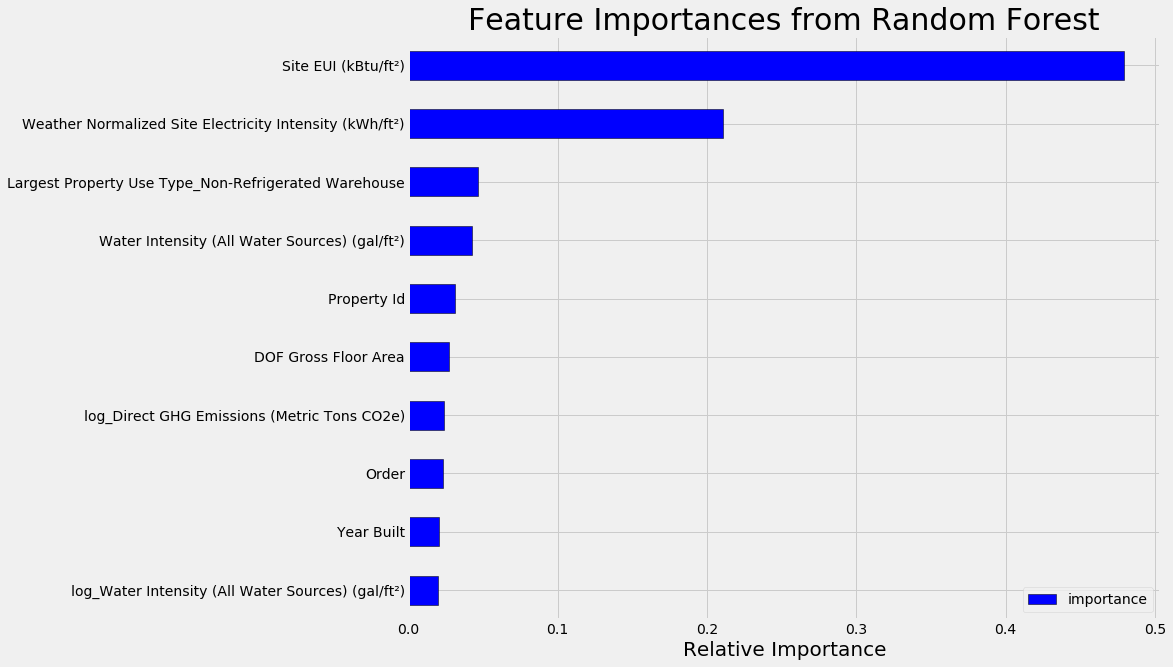

In [49]:
feature_results = pd.DataFrame({'feature': list(train_features.columns), 
                                'importance': model.feature_importances_})
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

figsize(12, 10)
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance',edgecolor = 'k',kind='barh', color = 'blue')
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30)
plt.gca().invert_yaxis()